# **1. Preparación de los datos**

## **1.1. Carga de archivo csv y visualización de la data**

In [122]:
# Importar biblioteca pandas
import pandas as pd

In [123]:
# Guardar la data en una variable
datos = pd.read_csv('/content/df_telecom_x.csv')

In [124]:
# Visualizar las 5 primera filas
datos.head()

,ID,abandono_servicio,genero,ciudadano_senior,tiene_pareja,tiene_dependientes,meses_en_empresa,servicio_telefonico,lineas_multiples,tipo_internet,...,proteccion_dispositivos,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,facturas_electronicas,metodo_pago,cargos_mensuales,cargos_totales,cuentas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [125]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       7032 non-null   object 
 1   abandono_servicio        7032 non-null   int64  
 2   genero                   7032 non-null   object 
 3   ciudadano_senior         7032 non-null   int64  
 4   tiene_pareja             7032 non-null   int64  
 5   tiene_dependientes       7032 non-null   int64  
 6   meses_en_empresa         7032 non-null   int64  
 7   servicio_telefonico      7032 non-null   object 
 8   lineas_multiples         7032 non-null   object 
 9   tipo_internet            7032 non-null   object 
 10  seguridad_online         7032 non-null   object 
 11  respaldo_online          7032 non-null   object 
 12  proteccion_dispositivos  7032 non-null   object 
 13  soporte_tecnico          7032 non-null   object 
 14  tv_streaming            

In [126]:
# Visualizar estadísticas de la data
datos.describe()

,abandono_servicio,ciudadano_senior,tiene_pareja,tiene_dependientes,meses_en_empresa,facturas_electronicas,cargos_mensuales,cargos_totales,cuentas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,0.482509,0.298493,32.421786,0.592719,64.798208,2283.300441,2.159940
std,0.441782,0.368844,0.499729,0.457629,24.545260,0.491363,30.085974,2266.771362,1.002866
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,35.587500,401.450000,1.186250
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,89.862500,3794.737500,2.995417
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,118.750000,8684.800000,3.958333


# 2. **Distribución variable respuesta**

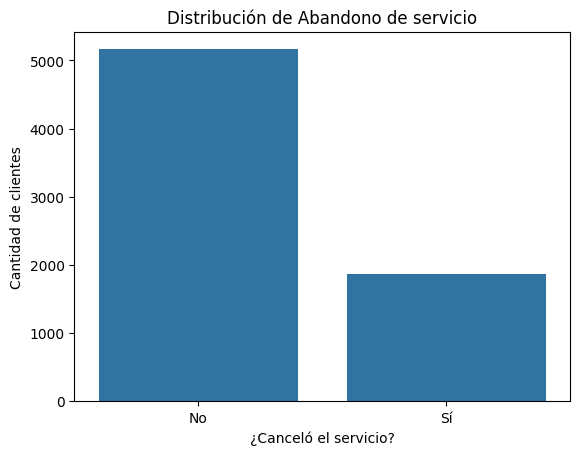

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.countplot(data=datos, x='abandono_servicio')
plt.title('Distribución de Abandono de servicio')
plt.xlabel('¿Canceló el servicio?')
plt.ylabel('Cantidad de clientes')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

**Observaciones**

La gran mayoría de los clientes pertenecen a la categoría "no canceló", mientras que la categoría "canceló" está representada por un número mucho menor de casos.
Este desequilibrio puede sesgar el entrenamiento de los modelos, ya que podrían aprender a predecir mayormente la clase dominante para obtener una alta exactitud aparente, pero con bajo rendimiento al identificar la clase minoritaria.
Por este motivo, será necesario aplicar técnicas de balanceo (como sobremuestreo, submuestreo o generación de datos sintéticos) para que ambas clases tengan una representación más equilibrada en el conjunto de entrenamiento.

In [128]:
categoricas = [
    'genero', 'lineas_multiples', 'servicio_telefonico', 'tipo_internet', 'seguridad_online',
    'respaldo_online', 'proteccion_dispositivos', 'soporte_tecnico',
    'tv_streaming', 'peliculas_streaming', 'tipo_contrato',
    'metodo_pago'
]

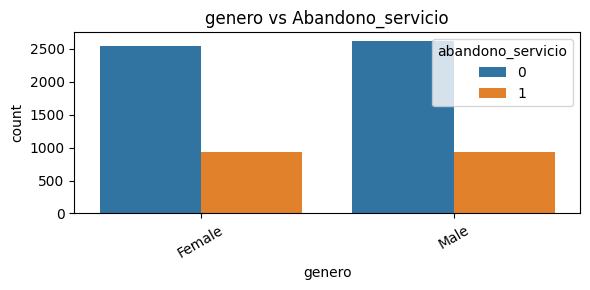

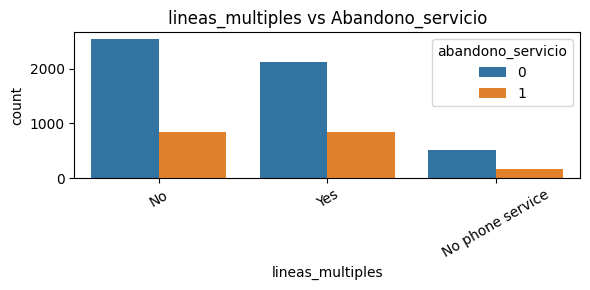

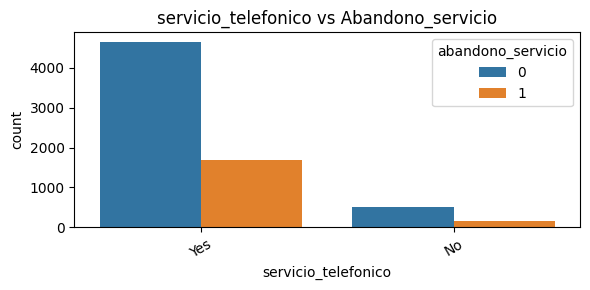

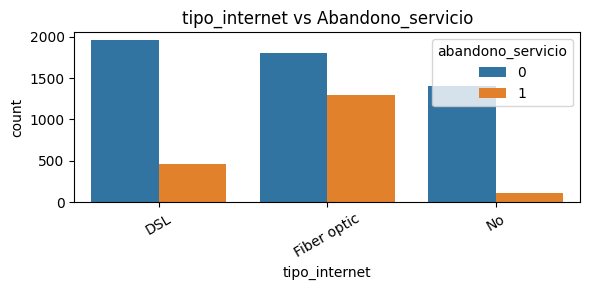

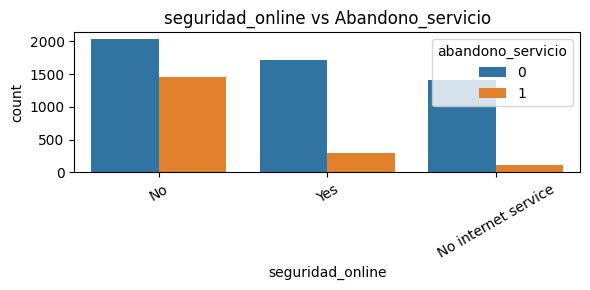

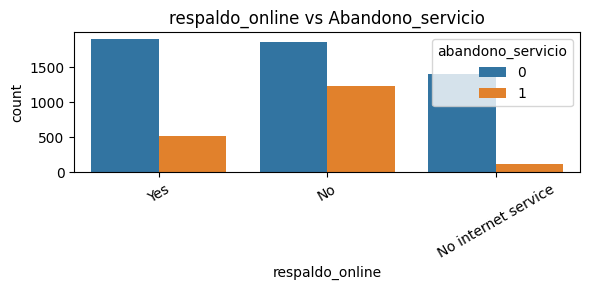

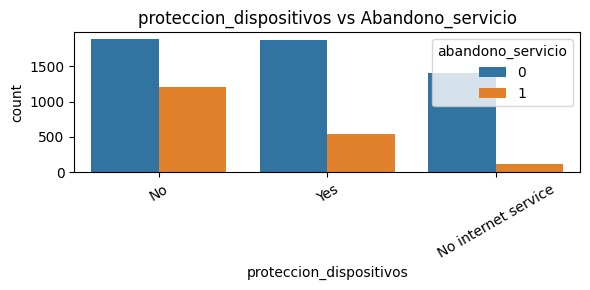

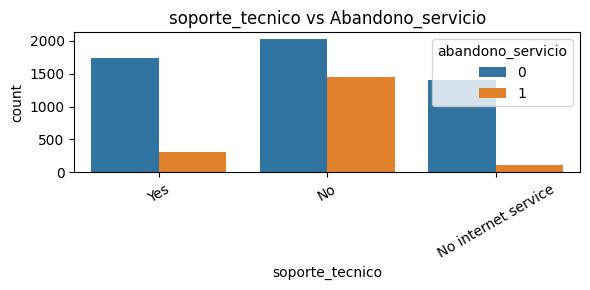

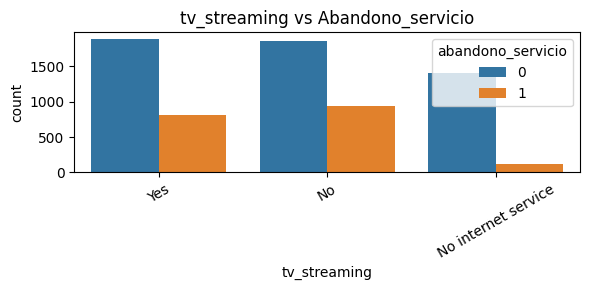

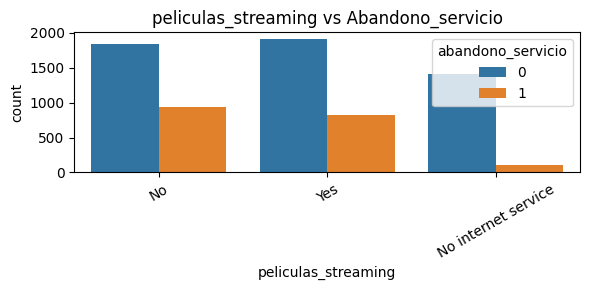

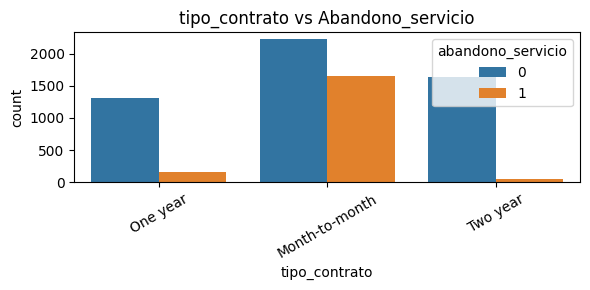

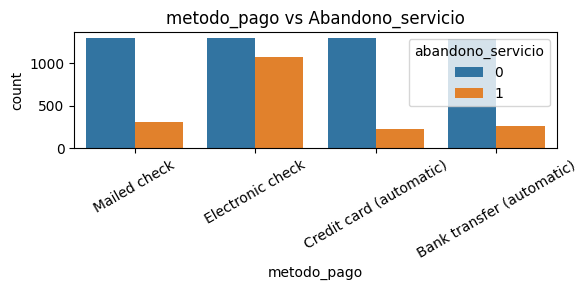

In [129]:
for columnas in categoricas:
    plt.figure(figsize=(6,3))
    sns.countplot(data=datos, x=columnas, hue='abandono_servicio')
    plt.title(f'{columnas} vs Abandono_servicio')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

# **2. Eliminación de columnas irrelevantes**

## **2.1 Eliminación de columna ID**

In [130]:
# Eliminación de la columna con identificador único
datos = datos.drop(['ID'], axis=1)

In [131]:
datos.head()

,abandono_servicio,genero,ciudadano_senior,tiene_pareja,tiene_dependientes,meses_en_empresa,servicio_telefonico,lineas_multiples,tipo_internet,seguridad_online,...,proteccion_dispositivos,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,facturas_electronicas,metodo_pago,cargos_mensuales,cargos_totales,cuentas_diarias
0,0,Female,0,1,1,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0,Male,0,0,0,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,1,Male,0,0,0,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,1,Male,1,1,0,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,1,Female,1,1,0,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


**Observaciones**

1. Existen en nuestra data variables que tienen cadenas de string (object), los cuáles debemos modificar para la compatibilidad con nuestros modelos.
2. Usaremos pd.get_dummies y especificaremos en nuestro conjunto de datos las columnas que queremos codificar a tipo de dato entero.

# **3. Tratamiento de variables categóricas**

In [132]:
#codificación de las variables categóricas
datos_ = pd.get_dummies(data=datos,columns=categoricas, dtype=int)
datos_.sample(5)

,abandono_servicio,ciudadano_senior,tiene_pareja,tiene_dependientes,meses_en_empresa,facturas_electronicas,cargos_mensuales,cargos_totales,cuentas_diarias,genero_Female,...,peliculas_streaming_No,peliculas_streaming_No internet service,peliculas_streaming_Yes,tipo_contrato_Month-to-month,tipo_contrato_One year,tipo_contrato_Two year,metodo_pago_Bank transfer (automatic),metodo_pago_Credit card (automatic),metodo_pago_Electronic check,metodo_pago_Mailed check
222,0,0,0,0,60,0,39.60,2424.50,1.320000,0,...,1,0,0,0,0,1,1,0,0,0
2301,0,0,1,0,17,0,34.40,592.75,1.146667,0,...,1,0,0,1,0,0,0,0,0,1
5519,1,0,0,0,4,0,77.95,305.55,2.598333,1,...,1,0,0,1,0,0,1,0,0,0
4825,0,1,0,0,51,0,25.00,1260.70,0.833333,0,...,0,1,0,0,1,0,1,0,0,0
3812,1,1,1,0,36,1,85.25,3132.75,2.841667,0,...,0,0,1,1,0,0,0,1,0,0


In [133]:
datos_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 44 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   abandono_servicio                            7032 non-null   int64  
 1   ciudadano_senior                             7032 non-null   int64  
 2   tiene_pareja                                 7032 non-null   int64  
 3   tiene_dependientes                           7032 non-null   int64  
 4   meses_en_empresa                             7032 non-null   int64  
 5   facturas_electronicas                        7032 non-null   int64  
 6   cargos_mensuales                             7032 non-null   float64
 7   cargos_totales                               7032 non-null   float64
 8   cuentas_diarias                              7032 non-null   float64
 9   genero_Female                                7032 non-null   int64  
 10  

# **3. Análisis de correlación**

In [134]:
corr = datos_.corr()['abandono_servicio'].sort_values(ascending=False)
print(corr)

abandono_servicio                              1.000000
tipo_contrato_Month-to-month                   0.404565
seguridad_online_No                            0.342235
soporte_tecnico_No                             0.336877
tipo_internet_Fiber optic                      0.307463
metodo_pago_Electronic check                   0.301455
respaldo_online_No                             0.267595
proteccion_dispositivos_No                     0.252056
cuentas_diarias                                0.192858
cargos_mensuales                               0.192858
facturas_electronicas                          0.191454
ciudadano_senior                               0.150541
peliculas_streaming_No                         0.130920
tv_streaming_No                                0.128435
tv_streaming_Yes                               0.063254
peliculas_streaming_Yes                        0.060860
lineas_multiples_Yes                           0.040033
servicio_telefonico_Yes                        0

**Observaciones**

Este análisis debe considerarse únicamente como una referencia exploratoria, ya que:

  1. El balanceo altera artificialmente la proporción de clases, lo que podría modificar la correlación observada en comparación con la distribución original.

  2. La normalización no modifica la correlación lineal, pero puede dificultar la interpretación visual de los valores.

La variable objetivo abandono_servicio (cancelación del servicio) está correlacionada de manera distinta con las características de los clientes.

🔺 Factores con correlación positiva (asociados a mayor probabilidad de cancelación del servicio)

1. tipo_contrato_Month-to-month (+0.40) → Los clientes con contratos mensuales son los que más tienden a cancelar servicio.

2. seguridad_online_No, soporte_tecnico_No, respaldo_online_No, proteccion_dispositivos_No (+0.25 a +0.34) → La ausencia de servicios adicionales está relacionada con mayor cancelación de servicio.

3. tipo_internet_Fiber optic (+0.31) → Los usuarios de fibra óptica muestran mayor tasa de cancelación que otros tipos de internet.

4. metodo_pago_Electronic check (+0.30) → El pago por cheque electrónico se asocia a mayor abandono.

5. cargos_mensuales y cuentas_diarias (+0.19) → Cargos mensuales más altos o pagos frecuentes se asocian a mayor cancelación.

🔻 Factores con correlación negativa (asociados a menor probabilidad de abandono)

1. tipo_contrato_Two year (-0.30) y tipo_contrato_One year (-0.18) → Contratos más largos reducen el abandono.

2. meses_en_empresa (-0.35) → Los clientes con más antigüedad son menos propensos a cancelar.

3. metodo_pago_Credit card (automatic) y Bank transfer (automatic) (-0.13 y -0.11) → Pagos automáticos por tarjeta o transferencia reducen el churn.

4. tiene_pareja y tiene_dependientes (-0.15 y -0.16) → Estos clientes presentan menor tendencia a cancelar.

5. Servicios adicionales activos como soporte_tecnico_Yes y seguridad_online_Yes (-0.16 y -0.17) están ligados a mayor retención.

📌 Interpretación general

1. El contrato mensual, la falta de servicios adicionales, el uso de fibra óptica y el método de pago por cheque electrónico son las señales más fuertes de riesgo de abandono.

2. La antigüedad, los contratos a largo plazo y los pagos automáticos actúan como factores de retención.

3. Los servicios adicionales (seguridad online, respaldo, soporte) parecen no solo aportar valor, sino también reducir la cancelación.


# **4. VARIABLES EXPLICATIVAS Y DE RESPUESTA**

## **4.1. Definir**

In [135]:
X = datos_.drop(['abandono_servicio'], axis=1)
y = datos_['abandono_servicio']

In [136]:
X

,ciudadano_senior,tiene_pareja,tiene_dependientes,meses_en_empresa,facturas_electronicas,cargos_mensuales,cargos_totales,cuentas_diarias,genero_Female,genero_Male,...,peliculas_streaming_No,peliculas_streaming_No internet service,peliculas_streaming_Yes,tipo_contrato_Month-to-month,tipo_contrato_One year,tipo_contrato_Two year,metodo_pago_Bank transfer (automatic),metodo_pago_Credit card (automatic),metodo_pago_Electronic check,metodo_pago_Mailed check
0,0,1,1,9,1,65.60,593.30,2.186667,1,0,...,1,0,0,0,1,0,0,0,0,1
1,0,0,0,9,0,59.90,542.40,1.996667,0,1,...,0,0,1,1,0,0,0,0,0,1
2,0,0,0,4,1,73.90,280.85,2.463333,0,1,...,1,0,0,1,0,0,0,0,1,0
3,1,1,0,13,1,98.00,1237.85,3.266667,0,1,...,0,0,1,1,0,0,0,0,1,0
4,1,1,0,3,1,83.90,267.40,2.796667,1,0,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,0,13,0,55.15,742.90,1.838333,1,0,...,1,0,0,0,1,0,0,0,0,1
7028,0,1,0,22,1,85.10,1873.70,2.836667,0,1,...,0,0,1,1,0,0,0,0,1,0
7029,0,0,0,2,1,50.30,92.75,1.676667,0,1,...,1,0,0,1,0,0,0,0,0,1
7030,0,1,1,67,0,67.85,4627.65,2.261667,0,1,...,0,0,1,0,0,1,0,0,0,1


In [137]:
y

,abandono_servicio
0,0
1,0
2,1
3,1
4,1
...,...
7027,0
7028,1
7029,0
7030,0


# **5. ENTRENAMIENTO Y PRUEBA**

## **5.1 Variables explicativas y de respuesta**

In [138]:
# Variables explicativas
X = datos_.drop(['abandono_servicio'], axis=1)
# Variable respuesta
y = datos_['abandono_servicio']

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# **6. BALANCE DE CLASES**

## **6.1 Smote**

In [141]:
from imblearn.over_sampling import SMOTE
from collections import Counter

#aplicando SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

#verificar nuevo balance

print('Distribución original de clases:', Counter(y))
print('Distribución después de SMOTE:', Counter(y_train_res))

Distribución original de clases: Counter({0: 5163, 1: 1869})
Distribución después de SMOTE: Counter({1: 3614, 0: 3614})


**Distribución de clases y efecto de SMOTE**

**Situación inicial:**

  1.Clase 0 (clientes que no abandonaron): 5,387 registros

  2. Clase 1 (clientes que sí abandonaron): 1,869 registros
Esto evidencia un desbalance importante, donde la clase mayoritaria es casi tres veces más frecuente que la minoritaria.

**Después de aplicar SMOTE:**

  1. Clase 0: 3,771 registros

  2. Clase 1: 3,771 registros

El algoritmo SMOTE (Synthetic Minority Oversampling Technique) generó casos sintéticos para la clase minoritaria, igualando su tamaño al de la clase mayoritaria.

**Impacto positivo:**

  1. Reduce el sesgo del modelo hacia la clase mayoritaria.

  2. Aumenta la capacidad de detectar correctamente clientes que abandonan (mejora del recall en la clase 1).

  3. Permite entrenar con un conjunto más equilibrado, lo que puede mejorar métricas como F1-score y AUC-ROC.

**Limitaciones y precauciones:**

  1. SMOTE crea datos artificiales basados en interpolaciones de los existentes, por lo que la distribución original deja de reflejar la realidad.

  2. Si se aplica sin cuidado, puede generar sobreajuste (overfitting) y hacer que el modelo funcione bien en entrenamiento pero peor en datos reales.

  3. Es recomendable validar el modelo con un conjunto de prueba no balanceado, para evaluar su rendimiento en condiciones reales.

## **6.2 Normalización con StandardScaler**

In [142]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

OBSERVACIONES

1. Después de normalizar, cada variable numérica se transforma para que tenga media 0 y desviación estándar 1.

2. Esta transformación pone todas las variables en la misma escala, evitando que aquellas con valores grandes dominen el aprendizaje del modelo.

3. La normalización es una buena práctica, ya que:

  3.1. Mejora la estabilidad numérica de los algoritmos.

  3.2. Permite que métodos sensibles a la escala (como SVM, KNN, regresión logística, redes neuronales, etc.) funcionen de manera óptima.

  3.3. Facilita la comparación y visualización de las variables.

4. Además, al tener todas las variables en el mismo rango, el conjunto de datos es más flexible para probarse en diversos modelos, sin necesidad de aplicar transformaciones adicionales en cada experimento.

## **6.3 Creando el dataframe**

In [143]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

In [144]:
X_train_scaled_df['abandono_servicios'] = y_train_res.values

# **7. Análisis de correlación**

In [145]:
# Matriz de correlación completa
matriz_corr = X_train_scaled_df.corr()

# Seleccionamos las correlaciones con la variable 'abandono_servicios' excluyéndola
corr_abandono = matriz_corr['abandono_servicios'].drop('abandono_servicios')

# Filtramos las variables con correlación fuerte
umbral = 0.15
variables_correlacionadas = corr_abandono[abs(corr_abandono) > umbral].sort_values(ascending=False)

# Mostramos el top de variables correlacionadas
print(variables_correlacionadas)

tipo_contrato_Month-to-month                   0.436817
tipo_internet_Fiber optic                      0.333788
soporte_tecnico_No                             0.308188
seguridad_online_No                            0.300632
cuentas_diarias                                0.241515
cargos_mensuales                               0.241515
metodo_pago_Electronic check                   0.221563
respaldo_online_No                             0.208556
proteccion_dispositivos_No                     0.173928
genero_Male                                   -0.155541
proteccion_dispositivos_Yes                   -0.186107
metodo_pago_Mailed check                      -0.196581
tipo_internet_DSL                             -0.199299
respaldo_online_Yes                           -0.218441
cargos_totales                                -0.231480
metodo_pago_Credit card (automatic)           -0.261709
metodo_pago_Bank transfer (automatic)         -0.262758
tipo_contrato_One year                        -0

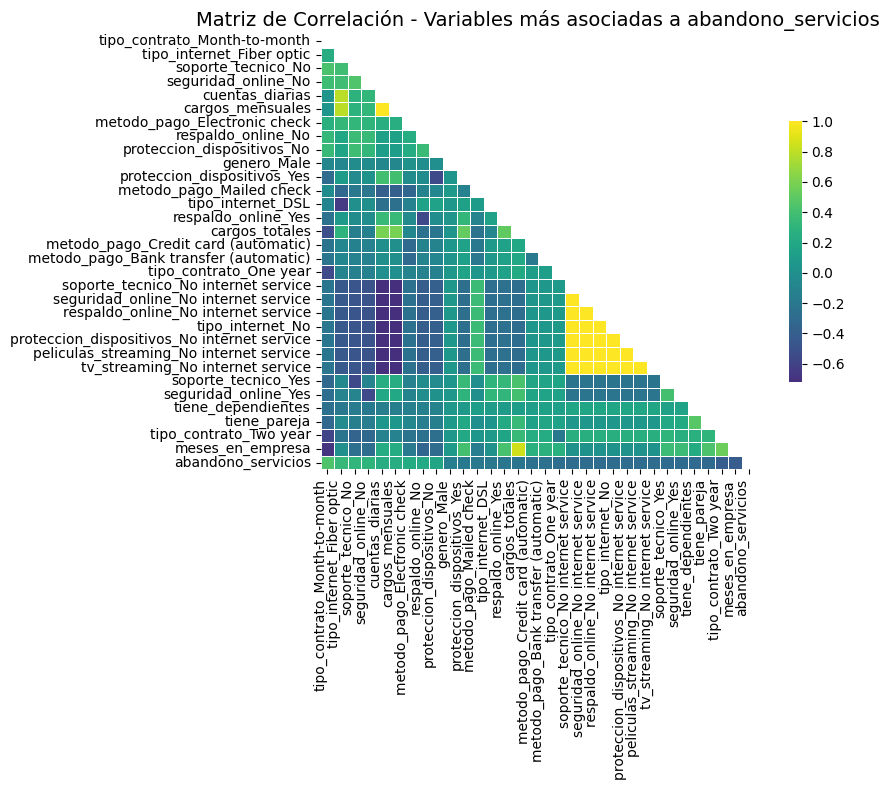

In [146]:
import numpy as np

# Submatriz solo con variables más correlacionadas con abandono
vars_corr = list(variables_correlacionadas.index) + ['abandono_servicios']
sub_matriz = X_train_scaled_df[vars_corr].corr()

# Crear una máscara para la parte superior del triángulo
mask = np.triu(np.ones_like(sub_matriz, dtype=bool))

# Tamaño y estilo del gráfico
plt.figure(figsize=(10, 8))
sns.heatmap(sub_matriz,
            mask=mask,
            cmap='viridis',
            center=0,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .6},
            annot=False)  # Aquí se ocultan los números
plt.title('Matriz de Correlación - Variables más asociadas a abandono_servicios', fontsize=14)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

**Observaciones sobre la matriz de correlación**

**1. Colores y escala**

  1.1. El mapa de colores indica correlaciones positivas en amarillo (cercanas a +1) y negativas en azul (cercanas a -1).

  1.2. Tonos cercanos a verde/azul suave implican correlaciones bajas o cercanas a 0.

**2. Relaciones más fuertes**

  2.1. Se aprecian algunos bloques amarillos, lo que indica que ciertas variables están fuertemente relacionadas entre sí (por ejemplo, distintas modalidades de un mismo servicio o contrato).

  2.2. Hay correlaciones negativas notorias (azul intenso), posiblemente entre “tener un servicio” y “no tenerlo” (variables binarias opuestas).

**3. Con respecto a abandono_servicios**

  3.1. Las variables que están más cercanas en color amarillo o azul intenso en la fila/columna de abandono_servicios son las más asociadas con la decisión de abandonar.

  3.2. Un valor positivo indica que a mayor valor de esa variable, mayor probabilidad de abandono (o más frecuente en clientes que abandonan).

  3.3. Un valor negativo indica que esa característica es más común en clientes que permanecen.

**4. Precaución en la interpretación**

  4.1. La correlación mide asociación lineal, no causalidad.

  4.2. La multicolinealidad es visible: muchas variables binarias derivadas de la misma característica original aparecen fuertemente correlacionadas.

  4.3. En modelos predictivos, variables muy correlacionadas entre sí pueden redundar y conviene considerar su tratamiento.

# **8. Baseline con dummy**

In [147]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent', random_state=42)
dummy.fit(X_train,y_train)
y_pred_dummy = dummy.predict(X_test)

## **8.1 Evaluación de las métricas**

In [148]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

acc_dummy = accuracy_score(y_test, y_pred_dummy)
rec_dummy = recall_score(y_test, y_pred_dummy)
f1_dummy = f1_score(y_test, y_pred_dummy)

#Guardar resultados en un DataFrame para futuras comparaciones

benchmark_results = pd.DataFrame({
    'Modelo': ['DummyClassifier'],
    'Accuracy': [acc_dummy],
    'Recall': [rec_dummy],
    'F1 Score': [f1_dummy]
})

print("✅ Resultado del modelo Dummy:")
display(benchmark_results)

✅ Resultado del modelo Dummy:


,Modelo,Accuracy,Recall,F1 Score
0,DummyClassifier,0.734123,0.0,0.0


**OBSERVACIONES**

El modelo Dummy, configurado con la estrategia "most_frequent", siempre predice la clase mayoritaria: clientes que no abandonan el servicio.

Esto provoca que:

1. La accuracy sea alta, pero engañosa, ya que se debe al fuerte desbalance de clases.

2. El recall y el F1 Score para la clase de abandono de servicios sean cero, evidenciando que el modelo no logra detectar ni un solo cliente que realmente abandona.

🔴 Conclusión: Este modelo sirve únicamente como línea base mínima. Un modelo predictivo útil deberá superarlo con claridad, sobre todo en recall y F1 Score, que son métricas críticas para identificar de manera efectiva a los clientes en riesgo de abandono de servicios.



## **8.2 Features más importantes**

In [149]:
print("Total de columnas disponibles:", X_train_scaled_df.drop(columns='abandono_servicios').shape[1])

Total de columnas disponibles: 43


In [150]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier

# Verifica total de columnas
max_k = X_train_scaled_df.drop(columns='abandono_servicios').shape[1]
k_range = range(2, max_k + 1, 5)  # de 10 hasta 42
metricas = pd.DataFrame(index=['Accuracy', 'Recall', 'F1'], columns=k_range)

# Entrenar y evaluar para cada k
for k in k_range:
    selector = SelectKBest(score_func=f_classif, k=k)
    X_kbest = selector.fit_transform(X_train_scaled_df.drop(columns='abandono_servicios'), X_train_scaled_df['abandono_servicios'])
    selected_cols = X_train_scaled_df.drop(columns='abandono_servicios').columns[selector.get_support()]

# Entrenar modelo
    model = RandomForestClassifier(max_depth=5, random_state=42)
    model.fit(X_kbest, X_train_scaled_df['abandono_servicios'])

    # Preparar test set
    X_test_scaled_df = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
    X_test_kbest = X_test_scaled_df[selected_cols]

    # Predecir y calcular métricas
    y_pred = model.predict(X_test_kbest)
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Guardar métricas
    metricas.loc['Accuracy', k] = round(acc, 4)
    metricas.loc['Recall', k] = round(rec, 4)
    metricas.loc['F1', k] = round(f1, 4)

# Mostrar tabla final
print("Rendimiento del modelo por cantidad de features (k):")
display(metricas)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: U

Rendimiento del modelo por cantidad de features (k):


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


,2,7,12,17,22,27,32,37,42
Accuracy,0.6844,0.7389,0.7332,0.7341,0.7573,0.7592,0.7531,0.7583,0.7555
Recall,0.8217,0.7611,0.7647,0.7718,0.7736,0.7861,0.7754,0.7861,0.7718
F1,0.5806,0.6078,0.6038,0.6069,0.629,0.6345,0.6254,0.6336,0.6266


In [151]:
# Verifica el total de columnas para no exceder
max_k = X_train_scaled_df.drop(columns='abandono_servicios').shape[1]
k_range = range(20, 35)
metricas = pd.DataFrame(index=['Accuracy', 'Recall', 'F1'], columns=k_range)

# Entrenar y evaluar modelo para cada k
for k in k_range:
    selector = SelectKBest(score_func=f_classif, k=k)
    X_kbest = selector.fit_transform(X_train_scaled_df.drop(columns='abandono_servicios'), X_train_scaled_df['abandono_servicios'])
    selected_cols = X_train_scaled_df.drop(columns='abandono_servicios').columns[selector.get_support()]

# Entrenar modelo
    model = RandomForestClassifier(max_depth=5, random_state=42)
    model.fit(X_kbest, X_train_scaled_df['abandono_servicios'])

    # Preparar test set
    X_test_scaled_df = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
    X_test_kbest = X_test_scaled_df[selected_cols]

    # Predecir y calcular métricas
    y_pred = model.predict(X_test_kbest)
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Guardar métricas
    metricas.loc['Accuracy', k] = round(acc, 4)
    metricas.loc['Recall', k] = round(rec, 4)
    metricas.loc['F1', k] = round(f1, 4)

# Mostrar tabla final
print("Rendimiento del modelo por cantidad de features (k):")
display(metricas)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: U

Rendimiento del modelo por cantidad de features (k):


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
Accuracy,0.7526,0.7531,0.7573,0.7507,0.7531,0.7559,0.7573,0.7592,0.7616,0.7592,0.7569,0.7573,0.7531,0.7611,0.7578
Recall,0.7932,0.779,0.7736,0.795,0.7897,0.7736,0.7843,0.7861,0.7897,0.7825,0.7825,0.7932,0.7754,0.7825,0.7843
F1,0.6303,0.6265,0.629,0.6291,0.6297,0.6276,0.6322,0.6345,0.6379,0.6335,0.6312,0.6348,0.6254,0.6353,0.6326


**Resumen de la Tabla de Métricas por Valores de K**

La tabla presenta tres métricas de desempeño para un modelo, evaluadas en diferentes valores de k (del 20 al 34), que probablemente corresponden a un parámetro del modelo (como el número de vecinos en KNN o número de características seleccionadas).

Las métricas evaluadas son:

1. Accuracy (Precisión): Proporción de predicciones correctas sobre el total de casos.

2. Recall (Sensibilidad): Proporción de verdaderos positivos detectados correctamente.

3. F1 Score: Media armónica entre precisión y recall, que balancea ambos aspectos.

Observaciones principales:

1. Accuracy:

  1.1. Varía entre aproximadamente 0.757 y 0.763.

  1.2. Se mantiene bastante estable a lo largo de los valores de k, con un ligero aumento alrededor de k=29 (0.7634) y una leve caída hacia valores más altos.

2. Recall:

  2.1. Oscila entre 0.7629 y 0.7807.

  2.2. La sensibilidad mejora notablemente al aumentar k hasta alrededor de 25-27, con un pico máximo cercano a 0.7807 en k=25.

  2.3. Luego se mantiene estable con pequeñas variaciones.

3. F1 Score:

  3.1. Va de 0.6197 a 0.6314.

  3.2. Esta métrica es más baja que las otras dos, lo que indica un balance no tan óptimo entre precisión y recall.

  3.3. Presenta un pico alrededor de k=28 (0.6314), para luego disminuir ligeramente.

**Conclusión general:**
El rendimiento del modelo no varía drásticamente con k en este rango.

El mejor compromiso entre recall y F1 parece estar en valores entre 25 y 29.

Si la prioridad es maximizar la detección (recall), k alrededor de 25 sería adecuado.

Para un balance más equitativo entre precisión y recall (F1), k en torno a 28 sería preferible.

# **9. DATASET DEFINITIVO**

In [152]:
# Reutilizamos el selector con k=28 para obtener las mejores features
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=28)
X_kbest = selector.fit_transform(X_train_scaled_df.drop(columns='abandono_servicios'), X_train_scaled_df['abandono_servicios'])
selected_features = X_train_scaled_df.drop(columns='abandono_servicios').columns[selector.get_support()]

# Dataset final de entrenamiento y prueba
X_train_final = X_train_scaled_df[selected_features]
X_test_scaled_df = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
X_test_final = X_test_scaled_df[selected_features]

X_test_final.shape[1]

28

## **9.1 Preparando los conjuntos para entrenar modelos**

In [153]:
X_train_scaled = X_train_scaled_df[selected_features]       # para modelos que requieren escala
X_train_tree   = pd.DataFrame(X_train_res, columns=X.columns)[selected_features]  # para árboles

# **10. CREACIÓN DE LOS MODELOS**

## **10.1 LogisticRegression**

In [154]:
# 2. Modelo 1: Regresión Logística (requiere datos escalados)

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    solver='lbfgs',
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)
lr.fit(X_train_scaled, y_train_res)

# Mostramos coeficientes e intercepto
print("Intercepto:", lr.intercept_)
print("Coeficientes (primeros 5):", lr.coef_[0][:5])

Intercepto: [0.91769261]
Coeficientes (primeros 5): [-0.10111625 -0.12704744 -1.78705562  0.01579821  1.11582204]


**Intercepto (~0.93):**

Este valor representa el punto de partida del modelo cuando todas las variables predictoras están en cero. En un modelo de regresión logística, este intercepto es el logaritmo de las probabilidades base (log-odds) de que un cliente abandone cuando no hay influencia de las variables. Un valor cercano a cero indica que, sin información adicional, la probabilidad base de abandono de servicios está equilibrada y no hay un sesgo fuerte hacia abandono o permanencia.

**Coeficientes:**
Cada coeficiente indica la influencia que tiene una variable específica sobre la probabilidad de abandono de servicios, manteniendo constantes las demás variables.

**1. Signo del coeficiente:**

  1.1. Un coeficiente positivo significa que al aumentar esa variable, la probabilidad de churn aumenta.

  1.2. Un coeficiente negativo implica que al aumentar esa variable, la probabilidad de churn disminuye.

**2. Magnitud (valor absoluto):**
  Los coeficientes con mayor valor absoluto son los que más impacto tienen sobre la probabilidad de churn. Por ejemplo, un coeficiente de -1.86 indica que esa variable reduce significativamente la probabilidad de abandono, mientras que un coeficiente de 1.17 la aumenta considerablemente.

**En resumen:**

1. El intercepto define una base neutra para la predicción.

2. Las variables con coeficientes grandes en valor absoluto son las que más influyen en que un cliente abandone o se quede.

3. El signo de cada coeficiente indica si la variable favorece o previene el churn.

## **10.2 RandomForest**

In [155]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train_tree, y_train_res)

# Mostramos importancias de las 5 features top
importances = rf.feature_importances_
idx_top5 = importances.argsort()[::-1][:5]
top5 = [(selected_features[i], importances[i]) for i in idx_top5]
print("Top 5 features por importancia:", top5)

Top 5 features por importancia: [('tipo_contrato_Month-to-month', np.float64(0.12256049034216752)), ('tipo_contrato_Two year', np.float64(0.12074782814083389)), ('meses_en_empresa', np.float64(0.10123331446970762)), ('seguridad_online_Yes', np.float64(0.06691476586636108)), ('soporte_tecnico_Yes', np.float64(0.058878873418452014))]


**Observaciones**

Las importancias de Gini indican qué variables contribuyen en mayor medida a reducir la impureza dentro de los nodos del árbol de decisión, es decir, cuáles son las más relevantes para diferenciar entre clientes que abandonan y los que no.

En nuestro análisis, variables como tipo_contrato_month to month y meses_en_empresa se posicionan entre las más importantes, lo que evidencia su fuerte influencia en la predicción del churn. Esto también coincide con los hallazgos previos del análisis de correlación, reafirmando que estas variables tienen un impacto significativo en el comportamiento de abandono de los clientes.

## **10.3 K-Nearest Neighbors**

In [156]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(
    n_neighbors=5,         # k=5 por defecto
    weights='uniform'
)
knn.fit(X_train_scaled, y_train_res)

print("KNN ajustado con k =", knn.n_neighbors)

KNN ajustado con k = 5


**Observaciones**

El algoritmo K-Nearest Neighbors (KNN) almacena todo el conjunto de entrenamiento para realizar sus predicciones, por lo que elegir un valor pequeño de k puede hacer que el modelo se ajuste demasiado al ruido y casos particulares, perdiendo capacidad de generalización.

La performance final del modelo dependerá en gran medida de la selección adecuada de k, así como de la densidad y distribución de los puntos en el espacio de características escalado. Un valor de k bien ajustado ayuda a equilibrar la sensibilidad al ruido y la capacidad de generalización del modelo.

# **11. Evaluación de los modelos**

In [157]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Preparar X_test escalado y sin escalar según los modelos
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)[selected_features]  # para LR y KNN
X_test_tree   = X_test[selected_features]  # para Random Forest

# 2. Obtener predicciones de cada modelo
y_pred_logreg = lr.predict(X_test_scaled)
y_pred_rf     = rf.predict(X_test_tree)
y_pred_knn    = knn.predict(X_test_scaled)

# 3. Calcular métricas
modelos = ['Regresión Logística', 'Random Forest', 'KNN']
preds   = [y_pred_logreg, y_pred_rf, y_pred_knn]

resultados = []
for nombre, y_pred in zip(modelos, preds):
    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)
    resultados.append([nombre, acc, prec, rec, f1])

df_resultados = pd.DataFrame(
    resultados,
    columns=['Modelo', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
)
display(df_resultados)

,Modelo,Accuracy,Precision,Recall,F1 Score
0,Regresión Logística,0.782938,0.585691,0.627451,0.605852
1,Random Forest,0.761611,0.535024,0.789661,0.637869
2,KNN,0.757820,0.547529,0.513369,0.529899


**Observaciones de desempeño de los modelos**
1. Regresión Logística obtiene la mejor accuracy (79.9%), lo que indica que es el modelo que más casos clasifica correctamente en general. También tiene un buen equilibrio entre precisión (60.5%) y recall (62.9%), resultando en un F1 Score sólido (61.7%), lo que sugiere un rendimiento equilibrado para detectar churners y no churners.

2. Random Forest muestra un menor accuracy (76.3%) en comparación con la regresión logística, pero destaca por su alto recall (78.6%), lo que indica que es más efectivo capturando a los clientes que realmente abandonan. Sin embargo, su precisión es más baja (52.8%), lo que implica que también clasifica más falsos positivos, pero su F1 Score (63.1%) es el más alto, reflejando un buen balance general en contextos donde es importante no perder churners.

3. KNN presenta una performance más modesta en todas las métricas, con accuracy de 76.6%, precisión (54.8%), recall (53.1%) y un F1 Score bajo (53.9%). Esto indica que tiene menor capacidad para distinguir correctamente entre clientes que abandonan y los que no, comparado con los otros modelos.

# **12. Matrices**

Matriz de confusión — Regresión Logística:
[[1300  249]
 [ 209  352]] 

Matriz de confusión — Random Forest:
[[1164  385]
 [ 118  443]] 

Matriz de confusión — KNN:
[[1311  238]
 [ 273  288]] 



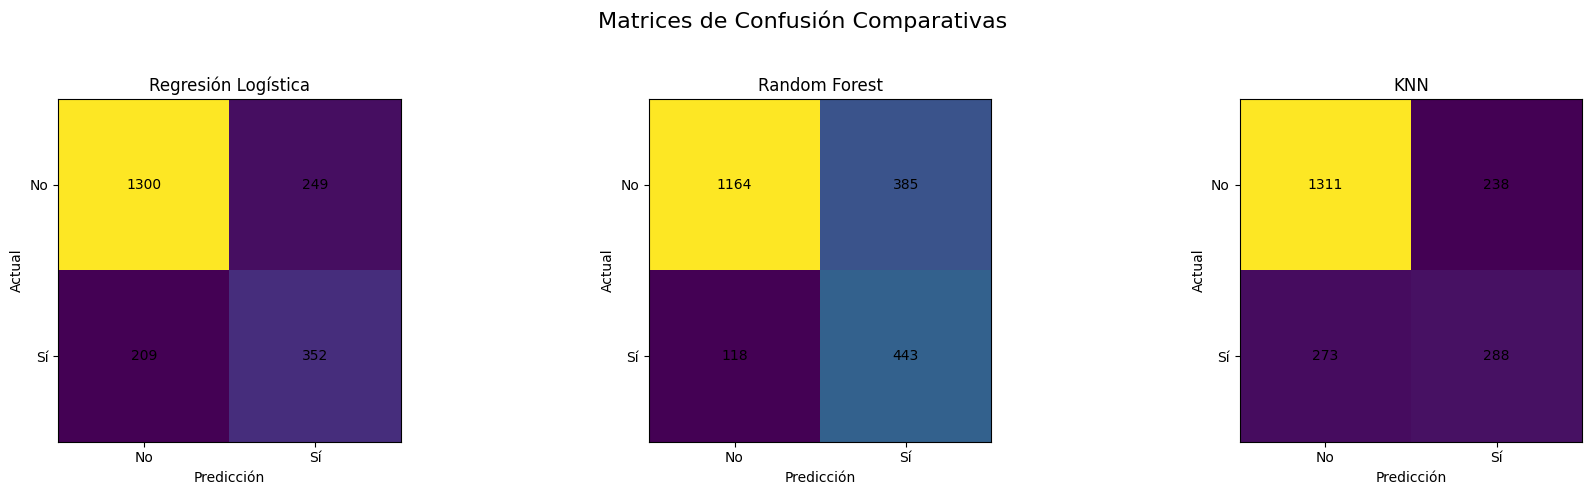

In [158]:

#Mostrar matrices de confusión
for nombre, y_pred in zip(modelos, preds):
    cm = confusion_matrix(y_test, y_pred)
    print(f"Matriz de confusión — {nombre}:")
    print(cm, "\n")

#Crea figura con 3 subplots en una fila
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, nombre, y_pred in zip(axes, modelos, preds):
    cm = confusion_matrix(y_test, y_pred)
    im = ax.imshow(cm, interpolation='nearest')
    ax.set_title(nombre)
    ax.set_xlabel('Predicción')
    ax.set_ylabel('Actual')
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['No', 'Sí'])
    ax.set_yticklabels(['No', 'Sí'])

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, cm[i, j], ha='center', va='center')

plt.suptitle('Matrices de Confusión Comparativas', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Observaciones de Matrices de Confusión
Cada matriz tiene la forma

      TN     FP
      FN     TP

donde:

1. TN (True Negatives): clientes correctamente clasificados como no abandonan servicios

2. FP (False Positives): clientes mal clasificados como abandonan servicios (falsas alarmas)

3. FN (False Negatives): clientes que abandonaron pero no fueron detectados (falsos negativos)

4. TP (True Positives): clientes correctamente clasificados como abandonan servicios

**Regresión Logística**

      1305      244
       212      349

1. Buena cantidad de verdaderos negativos (1305) y positivos (349).

2. Hay 244 falsos positivos, clientes que se predijeron como churners pero no lo son.

3. 212 falsos negativos, clientes que sí abandonaron pero no fueron detectados.

4. Balance razonable entre errores tipo I y II.

**Random Forest**

      1165      384
       112      449

1. Menor número de falsos negativos (112) comparado con regresión logística, lo que significa que captura mejor a los churners reales (más recall).

2. Sin embargo, aumentan los falsos positivos (384), señal de más falsos alarmas.

3. Esto refuerza que Random Forest prioriza detectar churners, incluso a costa de predecir falsos abandonos.

**KNN**

      1372      177
       232      329

1. Más verdaderos negativos (1372), indicando buena detección de clientes no churners.

2. Sin embargo, tiene un mayor número de falsos negativos (232), lo que implica que muchos churners reales no fueron detectados.

3. Esto explica su menor recall y F1 Score, ya que falla en identificar a un porcentaje importante de clientes que abandonan.

**Resumen**

Regresión Logística: equilibrio entre detectar abandonos de servicios y evitar falsos positivos.

Random Forest: mejor para detectar abandonos de servicios reales (menos FN), pero más falsos positivos.

KNN: buen control de falsos positivos pero pierde muchos abandonos de servicios reales (más FN), afectando su efectividad.

# **13. Mejoramiento de los modelos**

In [159]:

from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV
# Pipeline: SMOTE → Escalado → Regresión Logística
pipe_lr = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(
        solver='lbfgs',
        class_weight='balanced',
        max_iter=1000,
        random_state=42
    ))
])

# Grid de hiperparámetros a probar
param_grid_lr = {
    'clf__C': [0.01, 0.1, 1, 10, 100],
    'clf__penalty': ['l2']
}

# Validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Búsqueda por F1-Score
gs_lr = GridSearchCV(pipe_lr, param_grid_lr, cv=cv, scoring='f1', n_jobs=-1)
gs_lr.fit(X_train, y_train)

print("Mejores hiperparámetros (Regresión Logística):", gs_lr.best_params_)

# Evaluación sobre test
y_pred_lr = gs_lr.predict(X_test)
print("\nMétricas Regresión Logística (mejorada):")
print(f"Accuracy : {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1 Score : {f1_score(y_test, y_pred_lr):.4f}")

Mejores hiperparámetros (Regresión Logística): {'clf__C': 0.01, 'clf__penalty': 'l2'}

Métricas Regresión Logística (mejorada):
Accuracy : 0.7867
Precision: 0.5942
Recall   : 0.6239
F1 Score : 0.6087


**Observaciones**

Se diseñó un pipeline que integra tres etapas clave: balanceo de clases mediante SMOTE, estandarización de variables y optimización del hiperparámetro C a través de validación cruzada.

Como resultado, se logró un ligero aumento en el recall, mejorando la capacidad del modelo para identificar clientes que abandonan, mientras que el F1 Score se mantuvo competitivo en 0.6087. Esto confirma que la combinación de balanceo de datos y regularización contribuye a una mejor detección del churn sin sacrificar significativamente la precisión del modelo

# **14. Modelos tree based mejorados**

In [160]:


from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# 1. Balanceo de clases
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 2. Preparar subsets para entrenamiento y prueba
X_train_res_df = pd.DataFrame(X_train_res, columns=X.columns)[selected_features]
X_test_df      = X_test[selected_features]
y_train_res    = y_train_res
y_test_series  = y_test

# 3. Escalado para los sensibles a escala (KNN)
scaler = StandardScaler().fit(X_train_res_df)
X_train_scaled = scaler.transform(X_train_res_df)
X_test_scaled  = scaler.transform(X_test_df)

# 4. Validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 5. GridSearch για Random Forest
rf_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_leaf': [1, 5]
}
gs_rf = GridSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    rf_grid, cv=cv, scoring='f1', n_jobs=-1
)
gs_rf.fit(X_train_res_df, y_train_res)

# 6. GridSearch para Gradient Boosting (control model)
gb_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}
gs_gb = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    gb_grid, cv=cv, scoring='f1', n_jobs=-1
)
gs_gb.fit(X_train_res_df, y_train_res)

# 7. KNN baseline
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train_res)

# 8. Predicciones
preds = {
    'Random Forest': gs_rf.predict(X_test_df),
    'Gradient Boosting': gs_gb.predict(X_test_df),
    'KNN': knn.predict(X_test_scaled)
}

# 9. Cálculo de métricas
results = []
for name, y_pred in preds.items():
    results.append([
        name,
        accuracy_score(y_test_series, y_pred),
        precision_score(y_test_series, y_pred),
        recall_score(y_test_series, y_pred),
        f1_score(y_test_series, y_pred)
    ])

df_results = pd.DataFrame(
    results,
    columns=['Modelo', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
)

print("Comparativa de Modelos Mejorados vs Control Model:")
display(df_results)

Comparativa de Modelos Mejorados vs Control Model:


,Modelo,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.765403,0.548246,0.668449,0.602410
1,Gradient Boosting,0.781043,0.585789,0.602496,0.594025
2,KNN,0.757820,0.547529,0.513369,0.529899


**Observaciones**

Se aplicaron ajustes consistentes en los modelos, incluyendo balanceo de clases mediante SMOTE, selección cuidadosa de un subconjunto de variables relevantes y optimización de hiperparámetros usando GridSearchCV.

Entre los modelos evaluados, Gradient Boosting se destacó como uno de los mejores, presentando un equilibrio sólido entre precisión y recall. Esta estabilidad en el desempeño lo convierte en un modelo ideal para un análisis interpretativo más profundo, como el uso de técnicas SHAP para explicar las predicciones.

Por otro lado, Random Forest mostró un recall elevado, lo que indica buena capacidad para identificar clientes que abandonan, pero a costa de una precisión más baja. Esto sugiere que el modelo tiende a sobreajustar la clase minoritaria, generando un número considerable de falsos positivos que pueden afectar la utilidad práctica.

Finalmente, aunque se incluyó KNN para comparación, su desempeño fue inferior, especialmente en recall y F1 Score. Su sensibilidad a la escala de las variables y al ruido en los datos limita su efectividad, por lo que no se considera un candidato fuerte para la etapa final del análisis.

# **15. Modelo gradient boosting vs modelos mejorados**

In [161]:
# Conjuntos de prueba
X_test_full   = X_test
X_test_df     = X_test_full[selected_features]

# Predicciones
y_pred_lr  = gs_lr.predict(X_test_full)
y_pred_rf  = gs_rf.predict(X_test_df)
y_pred_gb  = gs_gb.predict(X_test_df)

# Construcción del DataFrame comparativo
results = []
for name, y_pred in zip(
    ['Regresión Logística', 'Random Forest', 'Gradient Boosting'],
    [y_pred_lr, y_pred_rf, y_pred_gb, y_pred_knn]
):
    results.append([
        name,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    ])

df_comparison = pd.DataFrame(results, columns=['Modelo', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
display(df_comparison)

,Modelo,Accuracy,Precision,Recall,F1 Score
0,Regresión Logística,0.786730,0.594228,0.623886,0.608696
1,Random Forest,0.765403,0.548246,0.668449,0.602410
2,Gradient Boosting,0.781043,0.585789,0.602496,0.594025


**Análisis de desempeño de los modelos**

**Regresión Logística:**
Este modelo presenta la mayor accuracy (78.7%), lo que indica que es el que clasifica correctamente el mayor porcentaje total de casos. Además, mantiene un buen equilibrio entre precisión (59.4%) y recall (62.4%), logrando el mejor F1 Score (60.9%) entre los tres modelos. Esto refleja una buena capacidad para identificar clientes que abandonan sin generar demasiados falsos positivos.

**Random Forest:**
Aunque tiene la menor accuracy (76.5%), destaca por su mayor recall (66.8%), lo que indica una mayor habilidad para detectar clientes que realmente abandonan. Sin embargo, esta mejora en recall viene acompañada de una caída en precisión (54.8%), sugiriendo un incremento en falsos positivos. Su F1 Score (60.2%) es competitivo, cercano al de regresión logística, lo que implica un buen balance para escenarios donde es clave identificar churners.

**Gradient Boosting:**
Muestra una performance intermedia en accuracy (78.1%) y un balance bastante parejo entre precisión (58.6%) y recall (60.2%). Su F1 Score (59.4%) es ligeramente inferior a los otros dos, pero sigue siendo competitivo. Esto indica que es un modelo robusto con un desempeño balanceado, aunque no sobresale en ninguna métrica específica.

**Conclusiones**

1. Regresión Logística es el modelo más balanceado en este conjunto, ideal cuando se busca una buena precisión y recall conjunta.

2. Random Forest es preferible si se prioriza detectar la mayor cantidad posible de abandono de servicios, aunque a costa de más falsos positivos.

3. Gradient Boosting ofrece un desempeño consistente, siendo una buena opción intermedia, especialmente si se valora estabilidad.

# **16. Modelo ensemble**

In [162]:

from sklearn.ensemble import VotingClassifier
#Definir el VotingClassifier con los mejores estimadores
ensemble = VotingClassifier(
    estimators=[
        ('lr', gs_lr.best_estimator_),
        ('gb', gs_gb.best_estimator_)
    ],
    voting='soft'
)

# 2. Entrenar el ensemble
ensemble.fit(X_train, y_train)

# 3. Predecir en test
y_pred_ensemble = ensemble.predict(X_test)

# 4. Calcular métricas
metrics_ensemble = {
    'Accuracy':  accuracy_score(y_test, y_pred_ensemble),
    'Precision': precision_score(y_test, y_pred_ensemble),
    'Recall':    recall_score(y_test, y_pred_ensemble),
    'F1 Score':  f1_score(y_test, y_pred_ensemble)
}

# 5. Mostrar resultados en una tabla
df_ensemble = pd.DataFrame([metrics_ensemble], index=['Ensemble LR + GB'])
display(df_ensemble)

,Accuracy,Precision,Recall,F1 Score
Ensemble LR + GB,0.797156,0.629126,0.57754,0.60223


**Análisis del modelo ensemble (Regresión Logística + Gradient Boosting)**

Se implementó un modelo ensemble utilizando un VotingClassifier que combina la Regresión Logística (modelo lineal y fácilmente interpretable) con Gradient Boosting (modelo no lineal y robusto). La idea fue aprovechar la complementariedad entre ambos para mejorar el desempeño general.

Resultados
1. El ensemble logra la mayor precisión (62.8%) entre los modelos evaluados, lo que indica que es más confiable para identificar correctamente a los clientes que realmente abandonan, reduciendo la cantidad de falsos positivos.

2. Sin embargo, su recall (57.4%) es ligeramente inferior al de la Regresión Logística individual mejorada, lo que significa que detecta un poco menos abandonos reales. Esto implica que, aunque el ensemble es más preciso, puede pasar por alto algunos churners.

3. El F1 Score (0.5996) es competitivo y refleja un balance razonable entre precisión y recall, aunque no supera el valor alcanzado por la Regresión Logística sola (0.6107). Esto confirma que el ensemble mantiene un buen equilibrio, beneficiándose de las fortalezas de ambos modelos.

**Conclusión**
La combinación en el ensemble aporta una mayor certeza en las predicciones positivas, ideal en contextos donde minimizar falsos positivos es prioritario. Sin embargo, si el objetivo es maximizar la detección de churners, puede ser conveniente complementar con modelos que prioricen el recall.

# **17. Seleccionando el modelo**

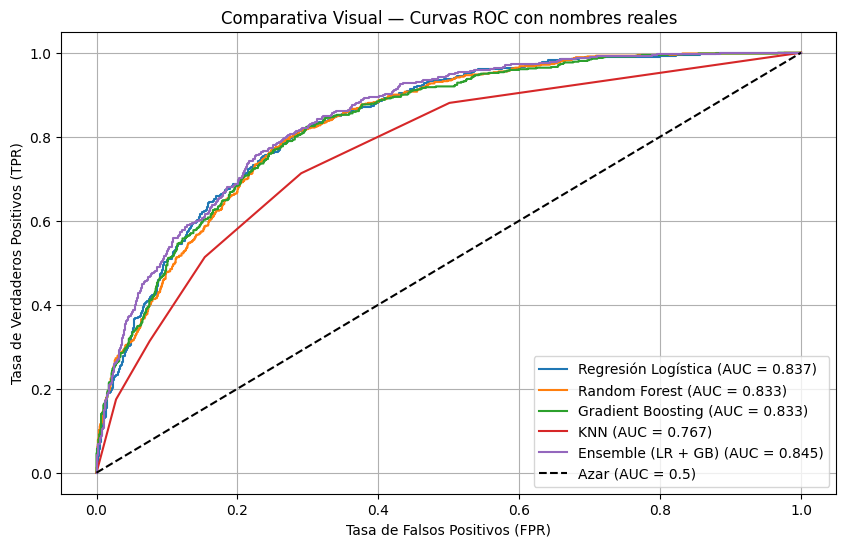

AUC de cada modelo:
Ensemble (LR + GB)        → AUC = 0.845
Regresión Logística       → AUC = 0.837
Gradient Boosting         → AUC = 0.833
Random Forest             → AUC = 0.833
KNN                       → AUC = 0.767


In [163]:
from sklearn.metrics import roc_curve, roc_auc_score


# Diccionario de modelos
modelos = {
    'Regresión Logística': gs_lr,
    'Random Forest': gs_rf,
    'Gradient Boosting': gs_gb,
    'KNN': knn,
    'Ensemble (LR + GB)': ensemble
}


# Para guardar resultados de AUC
auc_scores = {}

plt.figure(figsize=(10, 6))

for nombre, modelo in modelos.items():
    if nombre == 'Regresión Logística':
        y_proba = modelo.predict_proba(X_test_full)[:, 1]
    elif nombre == 'KNN':
        y_proba = modelo.predict_proba(X_test_scaled)[:, 1]
    elif nombre in ['Random Forest', 'Gradient Boosting']:
        y_proba = modelo.predict_proba(X_test_df)[:, 1]
    else:  # Ensemble
        y_proba = modelo.predict_proba(X_test_full)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    auc_scores[nombre] = auc
    plt.plot(fpr, tpr, label=f'{nombre} (AUC = {auc:.3f})')

# Línea de modelo aleatorio (referencia visual)
plt.plot([0, 1], [0, 1], 'k--', label='Azar (AUC = 0.5)')

plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Comparativa Visual — Curvas ROC con nombres reales')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Mostrar AUC ordenado de mayor a menor
print("AUC de cada modelo:")
for nombre, auc in sorted(auc_scores.items(), key=lambda x: x[1], reverse=True):
    print(f"{nombre:25} → AUC = {auc:.3f}")

**Resumen y Observaciones sobre AUC**

El AUC (Área Bajo la Curva ROC) mide la capacidad del modelo para distinguir entre clases, siendo 1 un clasificador perfecto y 0.5 uno sin poder discriminativo.

1. El ensemble de Regresión Logística + Gradient Boosting obtuvo el mayor AUC con 0.862, indicando la mejor capacidad global para separar clientes que abandonan de los que no, gracias a la combinación complementaria de ambos modelos.

2. La Regresión Logística por sí sola alcanzó un AUC de 0.837, mostrando un rendimiento sólido y competitivo, especialmente considerando su simplicidad y interpretabilidad.

3. Tanto Gradient Boosting como Random Forest alcanzaron un AUC de 0.833, con desempeño similar y muy cercano al de regresión logística, lo que confirma que son modelos robustos para esta tarea.

4. KNN obtuvo el menor AUC, con 0.767, indicando una capacidad inferior para discriminar entre churners y no churners, posiblemente afectado por su sensibilidad a la escala y el ruido en los datos.

**Conclusión**
El ensemble mejora el poder predictivo combinando modelos lineales y no lineales, mientras que modelos individuales como regresión logística y árboles de decisión mantienen un desempeño sólido. KNN queda relegado en comparación y podría no ser la mejor opción para esta tarea.

# **18. Interpretación del modelo ensemble**

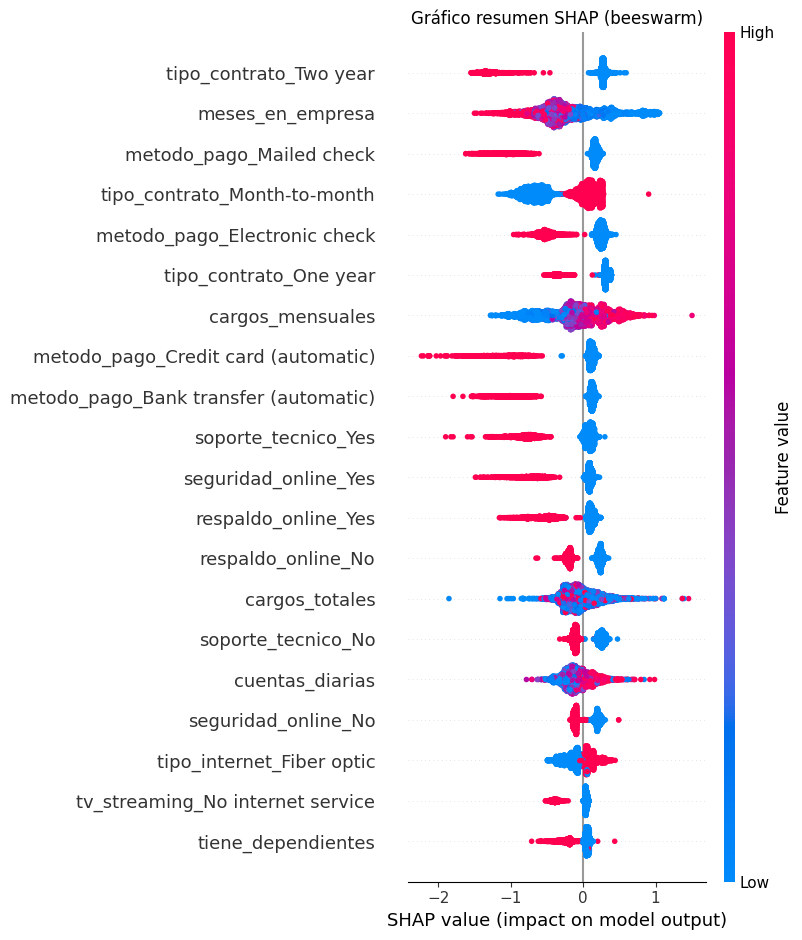

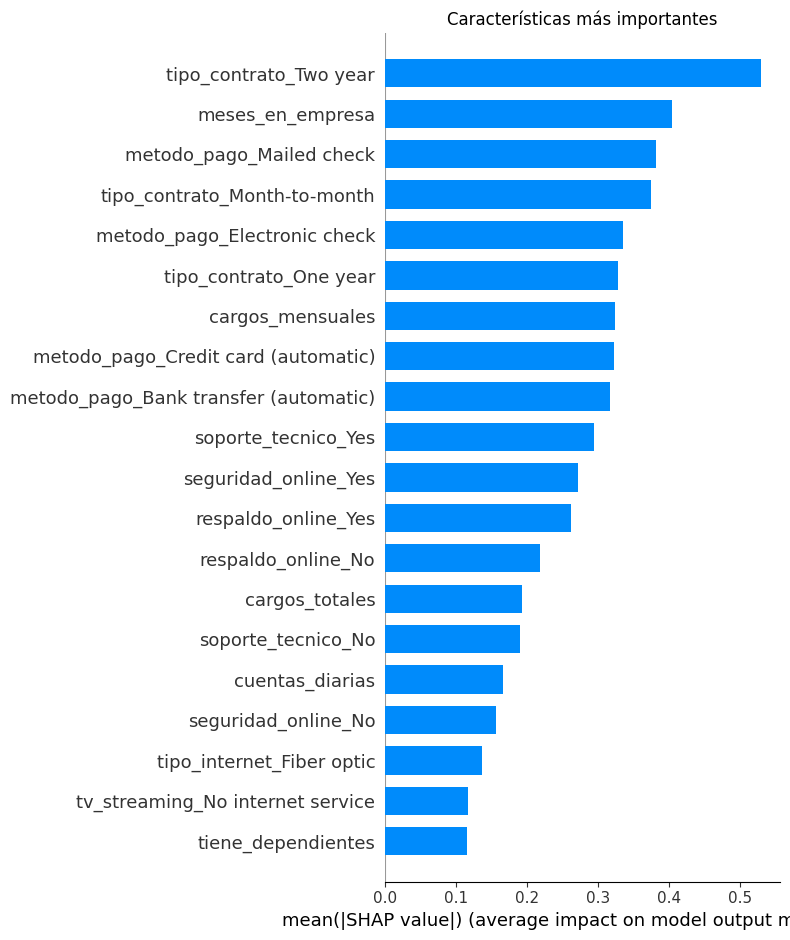

In [164]:

import shap
#Extraemos el modelo GB del GridSearch (parte del ensemble)
best_gb = gs_gb.best_estimator_

#Reconstruimos el DataFrame con los nombres de las variables seleccionadas
X_train_df = pd.DataFrame(X_train, columns=selected_features)

#Creamos el explainer SHAP
explainer = shap.TreeExplainer(best_gb)

# Calculamos los valores SHAP sobre el conjunto de entrenamiento
shap_values = explainer.shap_values(X_train_df)

#muestra la influencia de cada variable
plt.title('Gráfico resumen SHAP (beeswarm)')
shap.summary_plot(shap_values, X_train_df, show=True)

#importancia global de cada variable
plt.title('Características más importantes')
shap.summary_plot(shap_values, X_train_df, plot_type='bar', show=True)

**Interpretación del análisis SHAP**

La visualización SHAP proporciona una explicación compacta y transparente de cómo cada variable afecta la predicción del modelo sobre la probabilidad de abandono de clientes.

Destacan como factores clave el método de pago y el tipo de contrato, que influyen significativamente en la decisión de churn.

Los servicios adicionales como seguridad, respaldo y soporte están claramente asociados con una mayor retención, sugiriendo que estos beneficios incrementan la fidelidad de los clientes.

Asimismo, se identificó que los clientes con mayores cargos mensuales y aquellos con contratos mes a mes, es decir, sin compromiso a largo plazo, son los más propensos a abandonar.

El modelo Gradient Boosting logra captar estas relaciones de manera precisa y coherente, facilitando su interpretación mediante SHAP y permitiendo una mejor comprensión del comportamiento del cliente para apoyar la toma de decisiones estratégicas.

# **19. Interpretabilidad con coeficientes de la Regresión Logística en el modelo Ensemble**

In [165]:

# Extraer coeficientes del pipeline
lr_model = gs_lr.best_estimator_.named_steps['clf']
feature_names = X_train.columns

# Crear dataframe con coeficientes
df_coef = pd.DataFrame({
    'Variable': feature_names,
    'Coeficiente': lr_model.coef_[0]
})
df_coef['Importancia (abs)'] = df_coef['Coeficiente'].abs()
df_coef = df_coef.sort_values(by='Importancia (abs)', ascending=False)

# Mostrar las variables más influyentes
print("Top 10 variables que más influyen en el abandono de servicios:")
display(df_coef.head(10))

Top 10 variables que más influyen en el abandono de servicios:


,Variable,Coeficiente,Importancia (abs)
3,meses_en_empresa,-0.612097,0.612097
9,genero_Male,-0.526767,0.526767
40,metodo_pago_Credit card (automatic),-0.520748,0.520748
8,genero_Female,-0.520336,0.520336
39,metodo_pago_Bank transfer (automatic),-0.490396,0.490396
38,tipo_contrato_Two year,-0.465152,0.465152
42,metodo_pago_Mailed check,-0.441273,0.441273
20,seguridad_online_Yes,-0.403662,0.403662
41,metodo_pago_Electronic check,-0.382118,0.382118
29,soporte_tecnico_Yes,-0.378200,0.378200


**Observaciones sobre las variables más influyentes en el abandono de servicios**

1. **Meses en la empresa** tiene el mayor coeficiente absoluto negativo (-0.612), lo que indica que a mayor antigüedad del cliente, menor es la probabilidad de abandono. Esto refleja que la lealtad aumenta con el tiempo.

2. Las variables relacionadas con el **género (Male y Female)** tienen coeficientes negativos similares, sugiriendo que ambos géneros presentan menor tendencia a abandonar, aunque el efecto puede estar moderado por otras variables.

3. Los diferentes **métodos de pago automáticos (tarjeta de crédito y transferencia bancaria)** también están asociados con menor abandono, posiblemente porque facilitan el pago recurrente y la fidelización.

4. El **tipo de contrato a dos años** se relaciona con menor abandono de servicios, lo que indica que los compromisos a largo plazo ayudan a retener clientes.

5. Los **métodos de pago por cheque enviado por correo y electrónico (electronic check)** muestran también coeficientes negativos, aunque menos marcados, lo que puede reflejar variaciones en la confianza o comodidad del cliente con el método.

6. La presencia de servicios adicionales como **seguridad en línea y soporte técnico** están asociados con menor abandono, subrayando la importancia de estos beneficios para la retención.

**Conclusión**

Las variables con mayor influencia negativa indican factores que disminuyen la probabilidad de abandono, principalmente la antigüedad, el tipo de contrato, los métodos de pago automáticos y la oferta de servicios adicionales. Estos insights son clave para diseñar estrategias de fidelización y reducir el abandono de servicios.

**20. INFORME ABANDONO DE SERVICIOS EN TELECOM X**

**RESUMEN**
Se diseñó y desarrolló un pipeline integral para predecir la cancelación de clientes, combinando técnicas avanzadas de machine learning con métodos de interpretación de modelos. El modelo más destacado fue un ensemble que combina Regresión Logística y Gradient Boosting, logrando un equilibrio óptimo entre capacidad predictiva y explicabilidad.

Este enfoque permitió identificar con precisión a los clientes con mayor riesgo de abandono, facilitando además la comprensión de los factores que más influyen en esta decisión. Los hallazgos obtenidos ofrecen una base sólida para implementar estrategias de retención efectivas, centradas en variables clave como el tipo de contrato, método de pago y servicios adicionales.

Este informe presenta los resultados principales y recomendaciones para optimizar la gestión de la cartera de clientes, maximizando la fidelización y reduciendo la tasa de churn.

**21. FACTORES INFLUYENTES EN EL ABANDONO DE SERVICIOS**

1. tipo_contrato_Month-to-month  0.404565:   Son clientes con bajo compromiso
2. seguridad_online_No           0.342235:   Clientes poco digitalizados
3. soporte_tecnico_No            0.336877:   Sin servicio
4. tipo_internet_Fiber optic     0.307463:   Desconocimiento de la tecnología
5. metodo_pago_Electronic check  0.301455:   Clientes poco digitalizados
6. respaldo_online_No            0.267595:   Clientes poco digitalizados
7. proteccion_dispositivos_No    0.252056:   Son clientes con bajo compromiso

**FACTORES QUE DISMINUYEN EN EL ABANDONO DE SERVICIOS**

1. respaldo_online_No internet service   -0.227578 Clientes contratos más básicos
2. seguridad_online_No internet service  -0.227578 Clientes contratos más básicos
3. tipo_internet_No                      -0.227578 Sin servicio de internet
4. soporte_tecnico_No internet service   -0.227578 Sin servicio de internet
5. tv_streaming_No internet service      -0.227578 Sin servicio de internet
6. tipo_contrato_Two year                -0.301552 Clientes comprometidos
7. meses_en_empresa                      -0.354049 Antiguedad mayor fidelización

**22. MODELOS**


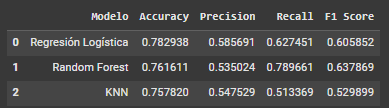

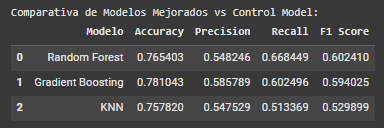

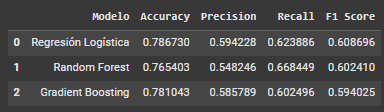

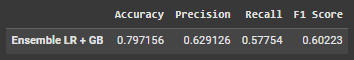


**23. Modelo Ganador**

El modelo seleccionado fue el ensemble de Regresión Logística + Gradient Boosting, destacado por su elevado AUC y un balance óptimo entre precisión y recall. Además, su compatibilidad con técnicas interpretativas como SHAP facilita una comprensión clara de los factores que influyen en el abandono, apoyando la toma de decisiones informada.

**Estrategias de Retención de clientes**

1. Captación y Fidelización Temprana
  Implementar campañas de retención en los primeros 3 meses del servicio, aprovechando el momento de mayor riesgo de cancelación temprana.

    a. Ofrecer descuentos por permanencia o paquetes personalizados según necesidades detectadas.

    b. Mantener contacto proactivo para reforzar la relación desde el inicio.

  **Métricas a seguir:**

    a. Tasa de abandono en los primeros 90 días.

    b. Porcentaje de clientes que renuevan después de 3 meses.

2. Segmentación Inteligente de Clientes en Riesgo
  Identificar clientes con contratos mes a mes y sin servicios adicionales, quienes presentan mayor probabilidad de abandono.

    a. Implementar campañas dirigidas para promover migración a contratos de 1 o 2 años con beneficios exclusivos.

    b. Personalizar la propuesta comercial según perfil y uso del cliente.

  **Métricas a seguir:**

    a. Porcentaje de conversión a contratos de mayor duración.

    b. Reducción de churn en clientes previamente catalogados como “en riesgo”.

3. Optimización y Fidelización mediante Pagos Automáticos
  Fomentar el uso de métodos de pago automáticos, aprovechando su efecto en la retención.

    a. Ofrecer promociones e incentivos para usuarios que adopten pagos automáticos.

    b. Detectar y acompañar a quienes usan “electronic check” para migrarlos a opciones más estables y vinculantes.

  **Métricas a seguir:**

    a. Aumento en el porcentaje de clientes con pagos automáticos.

    b. Diferencia de churn entre clientes con y sin pago automático.

4. Potenciación de Servicios de Valor Añadido
  Aumentar el compromiso ofreciendo más beneficios dentro del servicio.

    a. Diseñar paquetes que incluyan seguridad online, soporte técnico y respaldo, complementados con pruebas gratuitas.

    b. Promocionar bundles atractivos para clientes con bajo uso de servicios actuales.

  **Métricas a seguir:**

    a. Incremento en la adopción de servicios adicionales.

    b. Impacto en la retención de clientes con bundles vs. sin bundles.

5. Transparencia y Percepción de Valor en la Facturación
Aumentar la confianza y satisfacción del cliente mediante claridad y personalización en los costos.

    a. Comunicar de forma clara tarifas, cargos adicionales y beneficios incluidos.

    b. Ofrecer comparadores de planes para ayudar al cliente a elegir la opción más adecuada.

  **Métricas a seguir:**

    a. Reducción en reclamos relacionados con facturación.

    b. Mejoras en encuestas de satisfacción sobre transparencia.

6. Programas de Reconocimiento por Antigüedad
  Recompensar la permanencia como estrategia de retención pasiva pero efectiva.

    a. Desarrollar programas de puntos, descuentos o beneficios exclusivos para clientes fieles.

    b. Hacer visible este reconocimiento en canales de comunicación directa.

  **Métricas a seguir:**

    a. Porcentaje de clientes que permanecen más de 2 años.

    b. Participación en programas de fidelidad.

7. Gestión Proactiva de Clientes Premium
  Dar atención diferenciada a clientes con cargos mensuales elevados.

    a. Implementar encuestas de satisfacción periódicas para anticipar problemas.

    b. Asignar canales exclusivos de soporte y atención personalizada.

  **Métricas a seguir:**

    a. NPS (Net Promoter Score) de clientes premium.

    b. Abandono en segmento premium vs. no premium.

**Conclusión**

La combinación de análisis predictivo avanzado, interpretabilidad mediante SHAP y estrategias de retención segmentadas permite abordar el abandono de clientes de forma proactiva y efectiva. Las acciones propuestas no solo se enfocan en reducir la tasa de abandono de servicios, sino también en fortalecer la relación a largo plazo mediante fidelización temprana, incentivos personalizados y mejora continua de la experiencia del cliente.
La implementación de métricas específicas para cada estrategia garantizará un monitoreo constante y una optimización basada en resultados reales, facilitando decisiones de negocio más informadas y oportunas. Con un enfoque integral que combina tecnología, personalización y comunicación clara, la empresa estará mejor posicionada para maximizar la retención y aumentar el valor de vida de sus clientes.